# Libraries

In [15]:
import numpy as np, matplotlib.pyplot as plt
from Bio.Seq import Seq
from Bio import SeqIO

# Data

In [16]:
sequence = SeqIO.read('x.fasta', 'fasta')
SeqA = sequence.seq
SeqA

Seq('CTAACCCCTAACCCCTAACCCCTAACCCCTAACCCTAACCCTAACCCCTAACCC...GGT')

In [17]:
sequence2 = SeqIO.read('y3.fasta', 'fasta')
SeqB = sequence2.seq
SeqB

Seq('ACCCCTAACCCCTAACCCTAACCCTAACCCTAACCCCTAAACCCCTAACCCCTA...GGT')

# Quiz

## 1. Sequence Manipulation

### 1. Display the total length of Sequence X and Y.

In [18]:
print(f"The length of Sequence A: {len(SeqA)}")
print(f"The length of Sequence B: {len(SeqB)}")
print(f"The total length of Sequence A and Sequence B: {len(SeqA) + len(SeqB)}")

The length of Sequence A: 4653018
The length of Sequence B: 3811184
The total length of Sequence A and Sequence B: 8464202


### 2. Display which index the first time the codon CGC appearns in Sequece X and Sequence Y

In [19]:
print(f"First Index CGC at Sequence A: {SeqA.find('CGC')}")
print(f"First Index CGC at Sequence B: {SeqB.find('CGC')}")

First Index CGC at Sequence A: 157
First Index CGC at Sequence B: 154


### 3. Create new sequence by this following task:

#### 1. Take the first 10 Nucleotides from Sequence X and last 5 nucleotides from Sequence X.

In [25]:
first_x = SeqA[:10000]
sec_x = SeqA[-500000:]

#### 2. Take the first 20 nucleotides from sequence Y and the last 3 nucelotides from sequence Y

In [26]:
first_y = SeqB[:2000000]
sec_y = SeqB[-30000:]

#### Combining

In [27]:
SeqC = first_x + sec_x + first_y + sec_y
SeqC.replace('N', '')
SeqC

Seq('CTAACCCCTAACCCCTAACCCCTAACCCCTAACCCTAACCCTAACCCCTAACCC...GGT')

## 2. Sequence Analysis and Plotting

### 1. Display the nucleotides base (A and C) Frequency for Sequence Z with a chart using matplotlib library

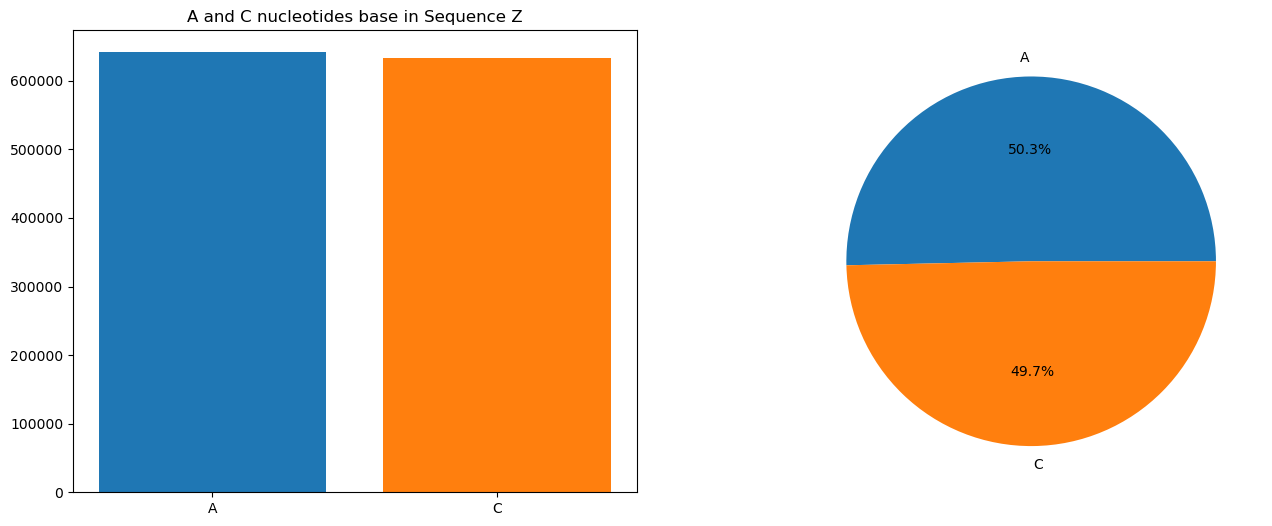

In [28]:
baseA = SeqC.count('A')
baseC = SeqC.count('C')
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
ax[0].bar('A', baseA)
ax[0].bar('C', baseC)
ax[0].set_title('A and C nucleotides base in Sequence Z')

plt.pie([baseA, baseC], labels=['A', 'C'], autopct = '%1.1f%%')
plt.show()

### Nucleotides Base

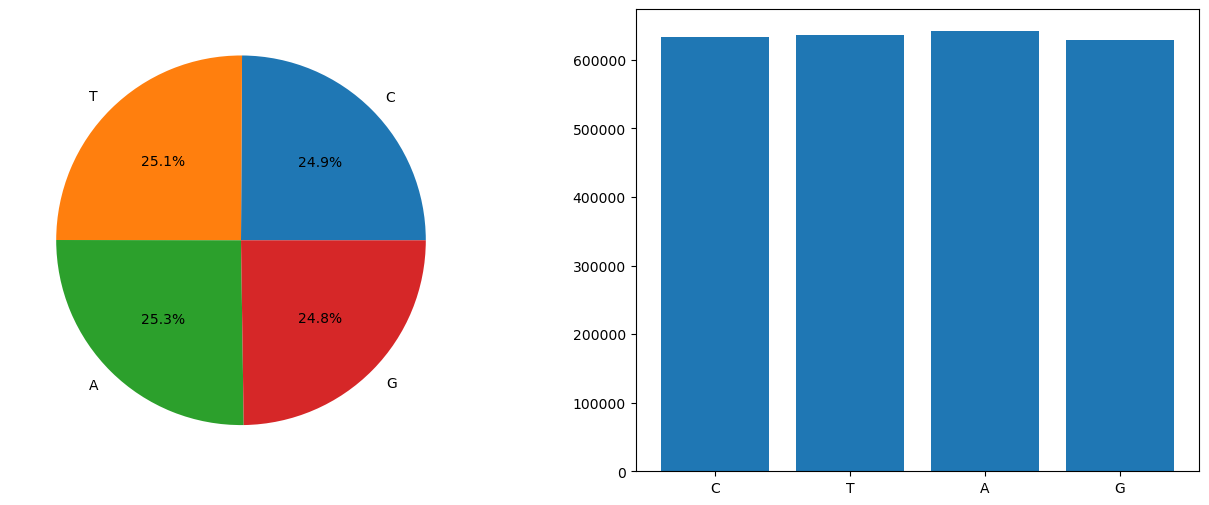

In [35]:
from collections import Counter
CounterC = Counter(SeqC)
keysC = CounterC.keys()
valuesC = CounterC.values()
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
plt.bar(keysC, valuesC)
ax[0].pie(valuesC, labels = keysC, autopct = '%1.1f%%')
plt.show()